In [ ]:
!pip install sklearn
!pip install mlxtend

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [91]:
dataset = pd.read_csv("dataset.csv")
dataset.drop(["Arrival Delay"] , inplace = True ,axis = 1)
dataset = dataset.sample(frac = 1).reset_index(drop = True)

In [92]:
dataset.head(5)

,Day,Month,Airline,Origin,Destination,Scheduled Departure,Departure Time,Departure Delay,Scheduled Arrival,Arrival Time,Actual Time,Distance,Status
0,24,1,Virgin America,Chicago O'Hare International Airport,Los Angeles International Airport,1815,1838.0,23.0,2057,2102.0,264.0,1744.0,1
1,29,1,Virgin America,Fort Lauderdale-Hollywood International Airport,San Francisco International Airport,1913,1909.0,-4.0,2240,2211.0,362.0,2584.0,0
2,15,2,Virgin America,Baltimore-Washington International Airport,San Francisco International Airport,1745,1742.0,-3.0,2057,2125.0,403.0,2457.0,1
3,9,2,Virgin America,Los Angeles International Airport,John F. Kennedy International Airport (New Yor...,1345,1341.0,-4.0,2212,2141.0,300.0,2475.0,0
4,25,2,Virgin America,Los Angeles International Airport,Newark Liberty International Airport,834,834.0,0.0,1658,1716.0,342.0,2454.0,1


### Preparing dataset for modeling
        Before solving the problem by using machine learning algorithms, I will prepare the data set and perform final cleanings:
        1. Remove Airline (the airline are Virgin America).
        2. Remove Arrival Delay (there is a Status column that represent which flight has delyad or not).
        3. Using OneHot encoding for the categorial features : Origin and Destination

In [93]:
dataset = pd.get_dummies(dataset , columns = ['Origin','Destination','Airline'])

The use of the various algorithms will be done by the **Sklearn library**, which provides a convenient library for various models in machine learning,
tools for analyzing the model performance and more.

In [94]:
y = np.array(dataset.Status)
dataset.drop("Status" , axis = 1 , inplace = True)
X = np.array(dataset)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
y_train = y_train.ravel() #change the shape of y_train to (number of sampels , )

In [95]:
def evaluate (model ,x_train , y_train , x_test , y_test ):
    
    train_size = x_train.shape[0]
    epochs = 10
    batch_size = 1024
    classes = np.unique(y_train)
    scores_train = []
    scores_test = []

    epoch = 0
    while epoch < epochs:
        print(f' Epoch number : {epoch}')
        random_perm = np.random.permutation(train_size)
        mini_batch = 0
        while True:
            indices = random_perm [mini_batch : mini_batch + batch_size]
            model.fit(x_train[indices], y_train[indices])
            mini_batch += batch_size

            if mini_batch >= train_size:
                break

        scores_train.append(model.score(x_train, y_train))
        scores_test.append(model.score(x_test, y_test))

        epoch += 1

    return scores_train , scores_test

In [96]:
def plot_learning_curve(scores_train , scores_test):
    print(f' Train Accuracy : {np.max(scores_train)} Validation Accuracy : {np.max(scores_test)}')
    print(f' The best number of epochs for training : {np.argmax(scores_test)}')
    plt.plot(scores_train, color='blue', marker='o', markersize=5, label = 'Training Accuracy')
    plt.plot(scores_test, color='green', marker='+', markersize=5, linestyle='--', label= 'Validation Accuracy')
    plt.title('Learning Curve')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Model accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

In [97]:
def plot_confusion_matrix(matrix, score):
    plt.figure(figsize=(9,9))
    sns.heatmap(matrix, annot=True, fmt = ".3f", linewidths=.5, square = True, cmap = 'Greens');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

### Logistic Regression

 Epoch number : 0
 Epoch number : 1
 Epoch number : 2
 Epoch number : 3
 Epoch number : 4
 Epoch number : 5
 Epoch number : 6
 Epoch number : 7
 Epoch number : 8
 Epoch number : 9
 Train Accuracy : 0.8574326608813254 Validation Accuracy : 0.8443334209834341
 The best number of epochs for training : 3


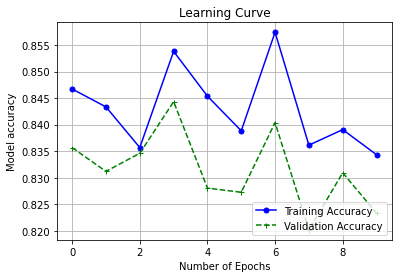

              precision    recall  f1-score   support

 Not Delayed       0.78      0.89      0.83      1890
     Delayed       0.88      0.75      0.81      1913

    accuracy                           0.82      3803
   macro avg       0.83      0.82      0.82      3803
weighted avg       0.83      0.82      0.82      3803

0.9108805533386539


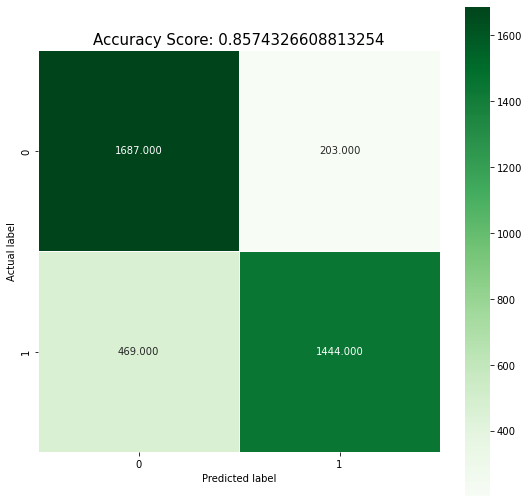

In [98]:
logistic_regression = make_pipeline(StandardScaler() , LogisticRegression(max_iter = 100 , solver = 'lbfgs' , class_weight = "balanced"))
scores_train , scores_test = evaluate(logistic_regression , x_train , y_train , x_test , y_test)
plot_learning_curve(scores_train , scores_test)
cm = metrics.confusion_matrix(y_test, logistic_regression.predict(x_test))
score = np.max(scores_train)
plot_confusion_matrix(cm, score)
print(classification_report(y_test, logistic_regression.predict(x_test), target_names= ['Not Delayed','Delayed']))
logistic_regression.fit(x_train,y_train)
print(f1_score(y_test, logistic_regression.predict(x_test)))

### Neural Network (MLP)

 Epoch number : 0
 Epoch number : 1
 Epoch number : 2
 Epoch number : 3
 Epoch number : 4
 Epoch number : 5
 Epoch number : 6
 Epoch number : 7
 Epoch number : 8
 Epoch number : 9
 Train Accuracy : 0.8164093316803787 Validation Accuracy : 0.7972653168551144
 The best number of epochs for training : 6


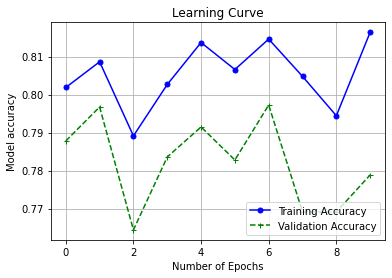

              precision    recall  f1-score   support

 Not Delayed       0.78      0.78      0.78      1890
     Delayed       0.78      0.78      0.78      1913

    accuracy                           0.78      3803
   macro avg       0.78      0.78      0.78      3803
weighted avg       0.78      0.78      0.78      3803

0.928421052631579


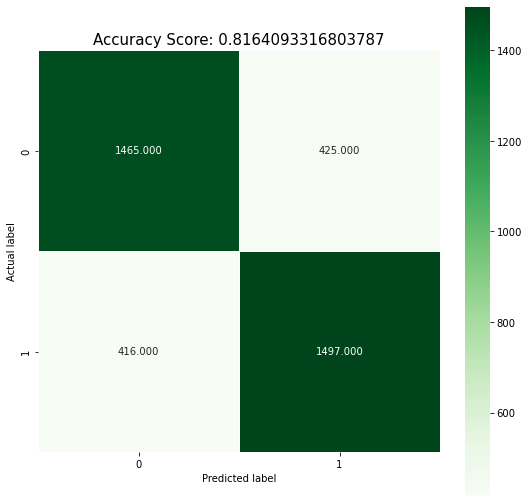

In [99]:
neural_network = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes = (128,64), activation="relu" , random_state = 1))
scores_train , scores_test = evaluate(neural_network , x_train , y_train , x_test , y_test)
plot_learning_curve(scores_train , scores_test)
cm = metrics.confusion_matrix(y_test, neural_network.predict(x_test))
score = np.max(scores_train)
plot_confusion_matrix(cm, score)
print(classification_report(y_test, neural_network.predict(x_test), target_names= ['Not Delayed','Delayed']))
neural_network.fit(x_train,y_train)
print(f1_score(y_test, neural_network.predict(x_test)))

### K Nearest Neighbors (KNN)

 Epoch number : 0
 Epoch number : 1
 Epoch number : 2
 Epoch number : 3
 Epoch number : 4
 Epoch number : 5
 Epoch number : 6
 Epoch number : 7
 Epoch number : 8
 Epoch number : 9
 Train Accuracy : 0.5997971373830723 Validation Accuracy : 0.5919011306863002
 The best number of epochs for training : 3


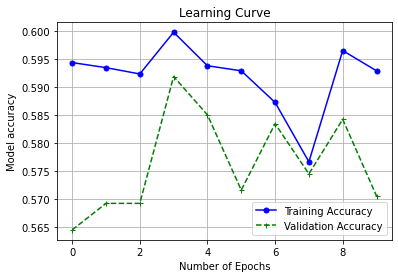

              precision    recall  f1-score   support

 Not Delayed       0.56      0.65      0.60      1890
     Delayed       0.59      0.49      0.53      1913

    accuracy                           0.57      3803
   macro avg       0.57      0.57      0.57      3803
weighted avg       0.57      0.57      0.57      3803

0.7014297729184189


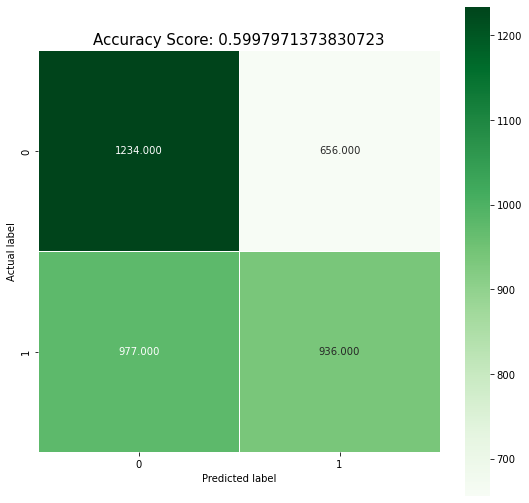

In [100]:
knn = make_pipeline(StandardScaler() , KNeighborsClassifier(n_neighbors = 5))
scores_train , scores_test = evaluate(knn , x_train , y_train , x_test , y_test)
plot_learning_curve(scores_train , scores_test)
cm = metrics.confusion_matrix(y_test, knn.predict(x_test))
score = np.max(scores_train)
plot_confusion_matrix(cm, score)
print(classification_report(y_test, knn.predict(x_test), target_names= ['Not Delayed','Delayed']))
knn.fit(x_train,y_train)
print(f1_score(y_test, knn.predict(x_test)))

### Random Forest

 Epoch number : 0
 Epoch number : 1
 Epoch number : 2
 Epoch number : 3
 Epoch number : 4
 Epoch number : 5
 Epoch number : 6
 Epoch number : 7
 Epoch number : 8
 Epoch number : 9
 Train Accuracy : 0.8182125549419588 Validation Accuracy : 0.7985800683670786
 The best number of epochs for training : 0


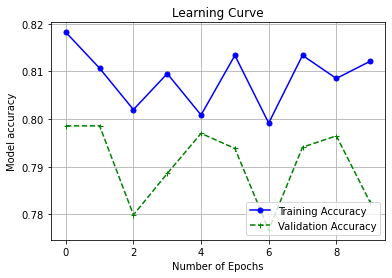

              precision    recall  f1-score   support

 Not Delayed       0.76      0.81      0.79      1890
     Delayed       0.80      0.75      0.78      1913

    accuracy                           0.78      3803
   macro avg       0.78      0.78      0.78      3803
weighted avg       0.78      0.78      0.78      3803

0.8968990193479989


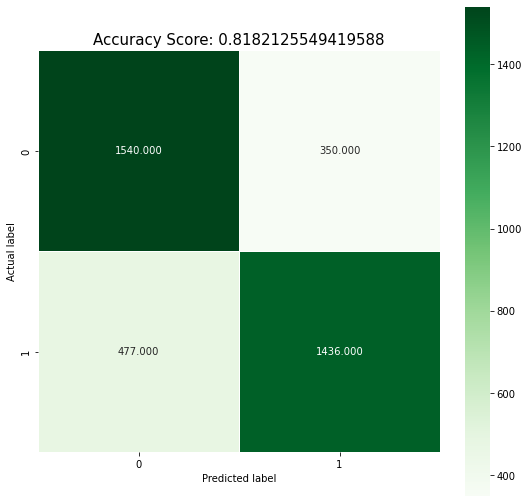

In [101]:
random_forest = make_pipeline(StandardScaler() , RandomForestClassifier(n_estimators = 100 , class_weight = "balanced"))
scores_train , scores_test = evaluate(random_forest , x_train , y_train , x_test , y_test)
plot_learning_curve(scores_train , scores_test)
cm = metrics.confusion_matrix(y_test, random_forest.predict(x_test))
score = np.max(scores_train)
plot_confusion_matrix(cm, score)
print(classification_report(y_test, random_forest.predict(x_test), target_names= ['Not Delayed','Delayed']))
random_forest.fit(x_train,y_train)
print(f1_score(y_test, random_forest.predict(x_test)))

### Predict Flight departure delay :
    We will now present a new problem, a regression problem whereby we would like to predict the number of
    minutes of flight delays during takeoff. Thus our dependent variable becomes Departure Delay, 
    and since we are dealing with a numerical value prediction problem we will use a linear regression model which looks for the
    different relationships between the independent variables and the dependent variable.

In [102]:
dataset = pd.read_csv("dataset.csv")
dataset = dataset.sample(frac = 1).reset_index(drop = True)
dataset.drop(["Status"] , inplace = True ,axis = 1)
lable = dataset.pop("Departure Delay")
dataset.insert(12,"Status",lable)

In [103]:
dataset = pd.get_dummies(dataset , columns = ['Origin','Destination','Airline'])
y = np.array(dataset.Status)
dataset.drop("Status" , axis = 1 , inplace = True)
X = np.array(dataset)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
y_train = y_train.ravel() #change the shape of y_train to (number of sampels , )

In [104]:
linear_regression = make_pipeline(StandardScaler() , LinearRegression())
linear_regression.fit(x_train,y_train)
print(linear_regression.score(x_test,y_test))

0.9749056043525164
